In [1]:
!pip install matplotlib
!pip install pandas
!pip install xlrd
!pip install openpyxl
!pip install seaborn
#!pip install --upgrade SciPy --user
print('Naloženo')

In [52]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
%matplotlib inline
import ipywidgets as widgets
from typing import Tuple
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
#from statsmodels.formula.api import ols
import sys
print("hallo world")

hallo world


In [53]:
#podatke mora naložiti v tem koraku, ker čene preveč traja
Zid = pd.read_excel (r"P:\OSVV\Jablana\2020\Zidaric_poskus_2020\Za obdelavo-vse\Vsi podatki zdruzeni-2.xlsx", 0) #bere file
print(Zid.columns) #naredi array z imeni stolpcev - izberemo katere od teh podatkov želimo prikazati
#nadaljujemo z ugotalvjanjem ukikatnih obravnavanj:
# print("Stolpec meso - deli merjeni: ", end =" "); print(pd.unique(Anka["meso"]))
ld = pd.unique(Zid["LD"])
print("Leva-Desna: ", end =" "); print(ld)
parc = pd.unique(Zid["parc"])
print("Parcele: ", end =" "); print(parc)
obr  = pd.unique(Zid["obr"])
print("Obravnavanja: ", end =" "); print(obr)
blok = pd.unique(Zid["blok"])
print("Blok: ", end =" "); print(blok)




Index(['LD', 'parc', 'obr', 'blok', 'st.drev', '16o', '17o', '18o', '19o',
       '17o.p', '18o.p', '19o.p', 'skup.o.p18', 'skup.o.p19', '17v%', '18v%',
       '19v%', 'SKUPv%18', 'SKUPv%19', 'IZLOCITI', '17-dol', '17st.pog',
       '17-avg.pog', '17.10plus', '17-vrh', '18-dol', '18st.pog', '18-avg.pog',
       '18.10plus', '18-vrh', 'izloci', '19-dol', '19-st.pog', '19-avg.pog',
       '19.10plus', '19-vrh', 'prir.dolz', 'prir.st', 'mirjena', '18I.st',
       '18I.kg', '18II.st', '18II.kg', '18.tla.st', '18st.j', '18.kg',
       '19I.st', '19I.kg', '19II.st', '19II.kg', '19.tla.st', '19st.j',
       '19.kg', '20I.st', '20I.kg', '20II.st', '20II.kg', '20.tla.st',
       '20st.j', '20.kg', 'vse'],
      dtype='object')
Leva-Desna:  ['L' 'D']
Parcele:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32]
Obravnavanja:  [1 2 3 4 5 6 7 8]
Blok:  [1 2 3 4]


In [54]:
print(Zid.shape)
#Zid['IZLOCITI'] = pd.to_numeric(Zid['IZLOCITI'])
Zid1= Zid.loc[(Zid['IZLOCITI'] <= 0)]
print(Zid1.shape)

#Zid1['mirjena'] = pd.to_numeric(Zid1['mirjena'])
Zid2= Zid1.loc[(Zid1['mirjena'] >= 5)]
print(Zid2.shape)

(637, 61)
(541, 61)
(226, 61)


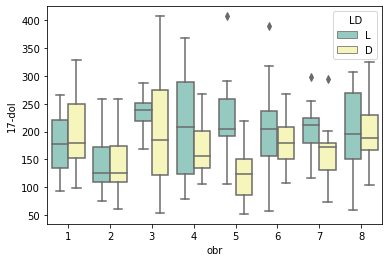

In [55]:
#Grafikon za priraste pogankov v 2017
Zid1= Zid.loc[(Zid['17-dol'] > 0)]
fig, ax = plt.subplots()
sns.boxplot(x="obr", y='17-dol', hue="LD", data=Zid1, palette="Set3", ax=ax)  #hue="meso",
plt.show() #prikaže vsak graf
fig.savefig('zidarič-prirat.png', dpi=300)

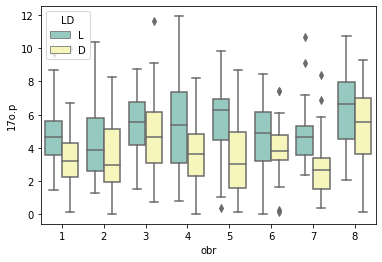

In [56]:
#Grafikon za priraste obsega v 2017
Zid1= Zid.loc[(Zid['17o.p'] > 0)] #izloči kjer je 0
fig, ax = plt.subplots()
sns.boxplot(x="obr", y='17o.p', hue="LD", data=Zid1, palette="Set3", ax=ax)  #hue="meso",
plt.show() #prikaže vsak graf
fig.savefig('zidarič-obseg.p.png', dpi=300)

In [67]:
Zid = pd.read_excel (r"P:\OSVV\Jablana\2020\Zidaric_poskus_2020\Za obdelavo-vse\Vsi podatki zdruzeni-2.xlsx", 0) #bere file

In [68]:
#povprečja po--
#print(Zid.groupby(['LD']).mean())

print(Zid.groupby('obr').agg({'17o.p':['mean','std', 'min', 'max']})) #izračuna povptrečja in SD
print(Zid.groupby('LD')['17o.p'].mean()) #izračuna samo povprečja

#    df.groupby('A').agg(np.std, ddof=1)    - agg({'top_speed(mph)': ['mean', 'min', 'max']
# Index(['LD', 'parc', 'obr', 'blok', 'st.drev', '16o', '17o', '18o', '19o',
#        '17o.p', '18o.p', '19o.p', 'skup.o.p18', 'skup.o.p19', '17v%', '18v%',
#        '19v%', 'SKUPv%18', 'SKUPv%19', 'IZLOCITI', '17-dol', '17st.pog',
#        '17-avg.pog', '17.10plus', '17-vrh', '18-dol', '18st.pog', '18-avg.pog',
#        '18.10plus', '18-vrh', 'izloci', '19-dol', '19-st.pog', '19-avg.pog',
#        '19.10plus', '19-vrh', 'prir.dolz', 'prir.st', 'mirjena', '19I.st',
#        '19I.kg', '19II.st', '19II.kg', '19.tla.st', '19st.j', '19.kg', 'vse'],
#       dtype='object')

        17o.p                               
         mean       std       min        max
obr                                         
1    3.982097  2.086935 -0.383166   9.934352
2    3.757650  2.227912 -0.536970  10.386408
3    4.515080  2.704883 -0.861869  11.644105
4    4.443401  2.629197 -1.270010  11.922585
5    4.374178  2.517550 -1.192645   9.819950
6    4.209116  1.842556 -0.419121   8.443313
7    3.672298  1.996335 -0.473770  10.662445
8    5.696598  2.574708  0.000000  10.735402
LD
D    3.693662
L    4.951999
Name: 17o.p, dtype: float64


In [74]:
#Izračuna povprečja po obravnavah --
#print(Zid.groupby(['LD']).mean())

print(Zid.groupby('obr').agg({'17o.p':'mean','18o.p':'mean','19o.p':'mean','17-dol':'mean','18-dol':'mean',
                              '18st.pog':'mean','19-dol':'mean','19st.pog':'mean','18.kg':'mean', 
                              '19.kg':'mean','20.kg':'mean'
                             })) #izračuna povptrečja in SD
#zračuna povptrečja in SD
#print(Zid.groupby('LD')['17o.p'].mean()) #izračuna samo povprečja

        17o.p     18o.p      19o.p     17-dol      18-dol   18st.pog  \
obr                                                                    
1    3.982097  6.132938  11.746835  75.392405  143.696203  17.126582   
2    3.757650  6.920640   9.289474  60.710526  120.328947  14.513158   
3    4.515080  7.798361  11.164268  89.533333  153.546667  15.213333   
4    4.443401  5.404976  10.072289  71.364706  130.835294  14.752941   
5    4.374178  5.795873  11.611111  75.657534  113.287671  13.575342   
6    4.209116  6.470957  11.412500  78.362500  149.437500  16.500000   
7    3.672298  6.147944  11.400000  66.640449  114.528090  12.449438   
8    5.696598  4.083424  11.364865  79.125000  137.212500  13.862500   

         19-dol   19st.pog     18.kg     19.kg     20.kg  
obr                                                       
1    130.443038  17.810127  0.235963  1.301557  1.181532  
2    119.868421  15.763158  0.264646  1.340013  1.040092  
3    136.346667  15.360000  0.285815  1.219

In [17]:
#Interaktivni graf z shranjevanjem. Podarki morajo biti uvoženi prej, da se hitro izvaja.
Zid= Zid2
k = ['LD', 'parc', 'obr', 'blok', 'st.drev', '16o', '17o', '18o', '17o.p',
       '18o.p', 'skup.o.p', '17v.del', '18v.del', 'SKUPv.del', 'IZLOCITI',
       '17-dol', '17st.pog', '17-avg.pog', '17.10plus', '17-vrh', '18-dol',
       '18st.pog', '18-avg.pog', '18.10plus', '18-vrh', 'izloci', '19o',
       '19-dol', '19-st.pog', '19-avg.pog', '19.10plus', '19-vrh', '19I.st',
       '19I.kg', '19II.st', '19II.kg', '19.tla.st', '19st.j', '19.kg',
       'Unnamed: 39'] #'cy3_1gal'] #izberemo katere parametre želimo računati - Glej kaj natisne "h"
xx =  ['obr', 'blok', 'LD', 'parc','st.drev','']
hue = ['LD','obr', 'blok',  'parc','st.drev',None]
y = ['16o', '17o', '18o', '19o',
       '17o.p', '18o.p', '19o.p', 'skup.o.p18', 'skup.o.p19', '17v%', '18v%',
       '19v%', 'SKUPv%18', 'SKUPv%19', 'IZLOCITI', '17-dol', '17st.pog',
       '17-avg.pog', '17.10plus', '17-vrh', '18-dol', '18st.pog', '18-avg.pog',
       '18.10plus', '18-vrh', 'izloci', '19-dol', '19-st.pog', '19-avg.pog',
       '19.10plus', '19-vrh', 'prir.dolz', 'prir.st', '19I.st', '19I.kg',
       '19II.st', '19II.kg', '19.tla.st', '19st.j', '19.kg', 'vse']
def f(x, y, hue):
    fig, ax = plt.subplots()
    Zid1= Zid.loc[(Zid[y] > 0.1)] # izloči kar je 0 v tabeli
    sns.boxplot(x=x, y=y, hue=hue, data=Zid1, palette="Set3", ax=ax)  #hue="meso",
    plt.show() #prikaže vsak graf
    nn = 'ZidariC'+x+hue+'_za_'+y+'.png'
    fig.savefig(nn, dpi=300)
    return(hue, x, y)
interact(f,x=xx, y=y, hue=hue);

interactive(children=(Dropdown(description='x', options=('obr', 'blok', 'LD', 'parc', 'st.drev', ''), value='o…

In [18]:
#NE DELUJE Interaktivni graf z izločanjem
Zid = pd.read_excel (r"P:\OSVV\Jablana\2020\Zidaric_poskus_2020\Za obdelavo-vse\Vsi podatki zdruzeni.xlsx", 0) #bere file
#print(Zid.columns)
print(len(Zid.index))
#print(Zid)
#Izločeno = Zid.loc[Zid['IZLOCITI'] == 0 ]
#Izločeno2 = Zid.loc[Zid['izloci'] == 0 ]
parc = pd.unique(Zid["parc"])

izl= ['vse','IZLOCITI','izloci']
Zid1=Zid
def f(izloči):
    Zid=Zid1.loc[Zid1[izloči] == 0 ]
    print('ostalo v obravnavi', len(Zid.index))
    def f(x, y, hue):
        Zid=Zid1.loc[Zid1[y] > 0] # naredi da se upoštevajo samo celice ki imajo podatek(ni nič ali beseda)
        print('ostalo v obravnavi', len(Zid.index)) # izpiše koliko vrstic je ostalo v obdelavi
        fig, ax = plt.subplots()
        sns.boxplot(x=x, y=y, hue=hue, data=Zid, palette="Set3", ax=ax)  #hue="meso",
        plt.show() #prikaže vsak graf
        return(hue, x, y)
    interact(f,x=xx, y=y, hue=hue);
interact(f,izloči=izl);
    

637


interactive(children=(Dropdown(description='izloči', options=('vse', 'IZLOCITI', 'izloci'), value='vse'), Outp…

In [20]:
#poiskušam z posthoc
#Interaktivni graf z izločanjem
import statsmodels.stats.multicomp as mc
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scipy.stats as ss
import statsmodels.api as sa
import scikit_posthocs as sp

Zid = pd.read_excel (r"P:\OSVV\Jablana\2020\Zidaric_poskus_2020\Za obdelavo-vse\Vsi podatki zdruzeni.xlsx", 0) #bere file
Zid4 = pd.read_excel (r"P:\OSVV\Jablana\2020\Zidaric_poskus_2020\Za obdelavo-vse\KopijaVsi podatki zdruzeni1.xlsx", 0) #bere file

#print(Zid.columns)
print(len(Zid.index))
#print(Zid)
#Izločeno = Zid.loc[Zid['IZLOCITI'] == 0 ]
#Izločeno2 = Zid.loc[Zid['izloci'] == 0 ]
parc = pd.unique(Zid["parc"])

izl= ['vse','IZLOCITI','izloci']
Zid1=Zid
def f(izloči):
    Zid=Zid1.loc[Zid1[izloči] == 0 ]
    print('ostalo v obravnavi', len(Zid.index))
    def f(x, y, hue):
        Zid=Zid1.loc[Zid1[y] > 0] # naredi da se upoštevajo samo celice ki imajo podatek(ni nič ali beseda)
        print('ostalo v obravnavi', len(Zid.index)) # izpiše koliko vrstic je ostalo v obdelavi
        fig, ax = plt.subplots()
        sns.boxplot(x=x, y=y, hue=hue, data=Zid, palette="Set3", ax=ax)  #hue="meso",
        plt.show() #prikaže vsak graf
        #delamo na dodajanju Anova
        yy=Zid[y] #pripravimo, dalahko bere OLS modul za ANOVA
        xx=Zid[x]
        huex=Zid[hue] 
#         model1=ols('yy ~ C(xx) + C(huex) + C(xx):C(huex)', data=Zid).fit()#naredimo dvofaktorsko anovo
#         #model1=ols('obse ~ C(obr) + C(blok) + C(obr):C(blok)', data=orders).fit()
#         anova_table1 = sm.stats.anova_lm(model1, typ=2)
#         print('ANOVA >xx=',x,'<  in >huex=', hue, '<   ter  >spremenljivaka=', y, '<')
#         print(anova_table1) #prikaže ANOVA tabelo
        lm = sfa.ols('yy ~ C(xx)', data=Zid).fit()
        anova = sa.stats.anova_lm(lm)
        print(anova)
                
        print('      ------POST HOC------za',y,x)     
        #Post-Hoc poskus
        hsd = mc.pairwise_tukeyhsd(Zid[y], Zid[x] )
        #print(hsd)
#         print('fridman')
#         fm= sp.posthoc_nemenyi_friedman(Zid, y_col=y, block_col=hue, group_col=x, melted=True)
#         print(fm)
        #za prikaz razlik med skupinami
       
        pc = sp.posthoc_conover(Zid, val_col=y, group_col=x)
        #pc = sp.posthoc_conover(Zid, val_col='obse', group_col='obr') #naredi posthoc preskuse
        print(pc)
        print('      ------Prikaz POST HOC------za',y,x)
        heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
        sp.sign_plot(pc, **heatmap_args) #izriše posthoc poskuse
        
        #return(izloči, hue, x, y)   #bi izpisalo vse izbrane parametre
    interact(f,x=xx, y=y, hue=hue);
interact(f,izloči=izl);
#bo še posthoc in ANOVA (Že skoraj dela)

637


interactive(children=(Dropdown(description='izloči', options=('vse', 'IZLOCITI', 'izloci'), value='vse'), Outp…

In [40]:
#poiskus dveh posthoc - ne uspem narediti interactivna
import seaborn as sns
#from typing import Tuple
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc

#(['LD', 'parc', 'obr', 'blok', 'st.drev', '16o', '17o', '18o', '17o.p',
#        '18o.p', 'skup.o.p', '17v.del', '18v.del', 'SKUPv.del', 'IZLOCITI',
#        '17-dol', '17st.pog', '17-avg.pog', '17.10plus', '17-vrh', '18-dol',
#        '18st.pog', '18-avg.pog', '18.10plus', '18-vrh', 'izloci', '19o',
#        '19-dol', '19-st.pog', '19-avg.pog', '19.10plus', '19-vrh', '19I.st',
#        '19I.kg', '19II.st', '19II.kg', '19.tla.st', '19st.j', '19.kg', 'vse'],
#       dtype='object')
Zid = pd.read_excel (r"P:\OSVV\Jablana\2020\Zidaric_poskus_2020\Za obdelavo-vse\KopijaVsi podatki zdruzeni1.xlsx", 0) 
# load data file
orders = Zid#pd.read_excel('/media/Data/topaz-redcenje-2020_7.5.xlsx', 0)
#h=orders.columns


y=Zid.obse
x=Zid.obr
xx=Zid.blok
#print(y)
model1=ols('y ~ C(x) + C(xx) + C(x):C(xx)', data=Zid).fit()
#model1=ols('obse ~ C(obr) + C(blok) + C(obr):C(blok)', data=orders).fit()
anova_table1 = sm.stats.anova_lm(model1, typ=2)
print(anova_table1)

# Post Hoc
data=Zid
hsd = mc.pairwise_tukeyhsd(data['obse'], data['obr'] )
print(hsd)

mc = statsmodels.stats.multicomp.MultiComparison(data['obse'], data['obr'])
mc_results = mc.tukeyhsd()
print(mc_results)

print('konc')

                  sum_sq     df         F        PR(>F)
C(x)         2109.054723    7.0  6.157912  5.657108e-07
C(xx)         833.673443    3.0  5.679608  7.706499e-04
C(x):C(xx)  10234.856669   21.0  9.961073  1.011435e-27
Residual    29601.365041  605.0       NaN           NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.5878    0.9 -4.5169  3.3412  False
     1      3  -4.2523 0.0242 -8.1947 -0.3099   True
     1      4   1.9244 0.7636 -1.8972   5.746  False
     1      5   1.2485    0.9 -2.7215  5.2185  False
     1      6   1.7862 0.8415 -2.0925  5.6649  False
     1      7   1.0023    0.9 -2.7777  4.7823  False
     1      8   0.5009    0.9 -3.3778  4.3796  False
     2      3  -3.6644 0.0967 -7.6446  0.3157  False
     2      4   2.5123 0.4968 -1.3482  6.3727  False
     2      5   1.8363 0.8457 -2.1711  5.8438  False
     2      6    2.374 0.5779  

In [21]:
Zid = pd.read_excel (r"P:\OSVV\Jablana\2020\Zidaric_poskus_2020\Za obdelavo-vse\KopijaVsi podatki zdruzeni1.xlsx", 0) 
import scipy.stats as ss
import statsmodels.api as sa
import scikit_posthocs as sp

#data = [df.loc[ids, 'Sepal.Width'].values for ids in df.groupby('Species').groups.values()]

import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp
#df = sa.datasets.get_rdataset('iris').data
#df.head()
#df.columns[1]="SepalWidth"
data=Zid
lm = sfa.ols('obse ~ C(obr)', data=data).fit()
anova = sa.stats.anova_lm(lm) #  data['obse'], data['obr']
print(anova)
#sp.posthoc_ttest(df, val_col='Sepal.Width', group_col='Species', p_adjust='holm')
sp.posthoc_ttest(data, val_col='obse', group_col='obr', p_adjust='holm')


             df        sum_sq     mean_sq         F    PR(>F)
C(obr)      7.0   2133.835213  304.833602  4.714552  0.000036
Residual  629.0  40669.895153   64.658021       NaN       NaN


,1,2,3,4,5,6,7,8
1,1.000000,1.000000,0.776796,0.295259,1.000000,0.246997,1.000000,1.000000
2,1.000000,1.000000,1.000000,0.038394,0.395103,0.021664,0.310424,1.000000
3,0.776796,1.000000,1.000000,0.090482,0.310424,0.119661,0.223512,0.661425
4,0.295259,0.038394,0.090482,1.000000,1.000000,1.000000,1.000000,1.000000
5,1.000000,0.395103,0.310424,1.000000,1.000000,1.000000,1.000000,1.000000
6,0.246997,0.021664,0.119661,1.000000,1.000000,1.000000,1.000000,1.000000
7,1.000000,0.310424,0.223512,1.000000,1.000000,1.000000,1.000000,1.000000
8,1.000000,1.000000,0.661425,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
x = np.array([[1,2,1,3,1,4], [12,3,11,9,3,8,1], [10,22,12,9,8,3]])
import statsmodels.api as sa
import scikit_posthocs as sp
df = sa.datasets.get_rdataset('iris').data
sp.posthoc_conover(df, val_col='Sepal.Width', group_col='Species', p_adjust = 'holm')
y=data.obse
x=data.obr
#print(y)
Pc = sp.posthoc_conover(data, val_col='obse', group_col='obr')
#pc = sp.posthoc_conover(data, val_col='obse', group_col='obr') #naredi posthoc preskuse
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args) #izriše posthoc poskuse

# pc = sp.posthoc_conover(x, val_col='values', group_col='groups')
# heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
# sp.sign_plot(pc, **heatmap_args)

# pc = sp.posthoc_conover(x, val_col='values', group_col='groups')
# # Format: diagonal, non-significant, p<0.001, p<0.01, p<0.05
# cmap = ['1', '#fb6a4a',  '#08306b',  '#4292c6', '#c6dbef']
# heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
# sp.sign_plot(pc, **heatmap_args)

C:\Users\jozehl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


NameError: name 'pc' is not defined

In [23]:
data = np.array([[ 8.82, 11.8 , 10.37, 12.08],
                     [ 8.92,  9.58, 10.59, 11.89],
                     [ 8.27, 11.46, 10.24, 11.6 ],
                     [ 8.83, 13.25,  8.33, 11.51]])
import scipy.stats as ss
ss.friedmanchisquare(*data.T)
import scikit_posthocs as sp
sp.posthoc_nemenyi_friedman(data)

,0,1,2,3
0,1.000000,0.220908,0.823993,0.031375
1,0.220908,1.000000,0.670273,0.823993
2,0.823993,0.670273,1.000000,0.220908
3,0.031375,0.823993,0.220908,1.000000
